# Recap of the Challenge details:
- The top 5 most active days of tweet by the subject. 
- The number of tweets and number of retweets. 
- Which 5 people did they retweet their posts the most and how many each. 
- What top 5 hours of the day do they tweet. 
- What kind of device do they use to tweet. 
- On average, how many times do they tweet a day.
- What day did they tweet the most and how many tweets. 
- What month did they tweet the most and how many tweets. 
- What are their top 15 words. 
- What are the top 10 hashtags they used. 

In [1]:
#Import needed libraries
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
from collections import Counter

plt.style.use('ggplot')

In [2]:
#Read in the required file
df = pd.read_csv('Exercise.csv')

# A quick EDA to see what we hold in the dataframe

In [3]:
#Shape of the df
print(f"There are {df.shape[0]:,} rows across {df.shape[1]} columns")

There are 3,229 rows across 13 columns


In [4]:
#the column names are
df.columns

Index(['created_at', 'text', 'in_reply_to_status_id_str', 'source',
       'in_reply_to_screen_name', 'contributors', 'quoted_status_id',
       'quote_count', 'reply_count', 'retweet_count', 'favorite_count',
       'retweeted', 'followers_count'],
      dtype='object')

In [5]:
#Let's see the datat type each column is holding. This will be important info down the line
df.dtypes

created_at                    object
text                          object
in_reply_to_status_id_str    float64
source                        object
in_reply_to_screen_name       object
contributors                 float64
quoted_status_id              object
quote_count                   object
reply_count                   object
retweet_count                  int64
favorite_count                 int64
retweeted                    float64
followers_count              float64
dtype: object

In [6]:
#A peep at other info about our data.
#Observe that some of the columns have null values as they have less than 3,229 non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3229 entries, 0 to 3228
Data columns (total 13 columns):
created_at                   3229 non-null object
text                         3229 non-null object
in_reply_to_status_id_str    1023 non-null float64
source                       3229 non-null object
in_reply_to_screen_name      1023 non-null object
contributors                 0 non-null float64
quoted_status_id             3229 non-null object
quote_count                  3229 non-null object
reply_count                  3229 non-null object
retweet_count                3229 non-null int64
favorite_count               3229 non-null int64
retweeted                    0 non-null float64
followers_count              0 non-null float64
dtypes: float64(4), int64(2), object(7)
memory usage: 328.1+ KB


In [7]:
#Finally, a look at the head of our df
df.head()

,created_at,text,in_reply_to_status_id_str,source,in_reply_to_screen_name,contributors,quoted_status_id,quote_count,reply_count,retweet_count,favorite_count,retweeted,followers_count
0,2019-12-19 08:20:07,"On behalf of my family, I wish @bukolasaraki a...",NaN,Twitter for iPhone,NaN,NaN,Not Availabe,Not Availabe,Not Availabe,1227,10787,NaN,NaN
1,2019-12-15 16:08:46,How sweet of my grandchildren to bring me a be...,NaN,Twitter for iPhone,NaN,NaN,Not Availabe,Not Availabe,Not Availabe,943,11928,NaN,NaN
2,2019-12-15 07:53:46,"On behalf of my family, I thank those present ...",NaN,Twitter for iPhone,NaN,NaN,Not Availabe,Not Availabe,Not Availabe,714,6539,NaN,NaN
3,2019-12-13 15:51:58,I congratulate @BorisJohnson on his reelection...,NaN,Twitter for iPhone,NaN,NaN,Not Availabe,Not Availabe,Not Availabe,639,5373,NaN,NaN
4,2019-12-10 09:44:44,#HumanRightsDay means that the global human co...,NaN,Twitter for iPhone,NaN,NaN,Not Availabe,Not Availabe,Not Availabe,822,3380,NaN,NaN


### The top 5 most active days of tweet by the subject. 
- This involves both their tweets and then retweet of other peopele's tweet. So we are looking at all 3,229 tweets

In [8]:
#Notice it is of type object now
df['created_at'].head(1)

0    2019-12-19 08:20:07
Name: created_at, dtype: object

In [9]:
#The type of our date column 'created_at' has to be a time object so we can work with it
#Convert created_at column to datetime
df['created_at'] = pd.to_datetime(df.created_at)

In [10]:
#We now have a datetime object. If any row did not convert we will still be stuck with type 'object'
df['created_at'].head(1)

0   2019-12-19 08:20:07
Name: created_at, dtype: datetime64[ns]

In [11]:
#Let's make new column 'dates' from column 'created_at' to hold only the date like year-month-day
df['dates'] = [line.date() for line in df.created_at] #call date() on each row of datetime value
#Let's have a peek of this column
df.dates.head(2)

0    2019-12-19
1    2019-12-15
Name: dates, dtype: object

In [12]:
#A value count will give us how many times each date occurred which is how many times they tweeted that day
#we save this ina variable 'top5_days'
top5_days = df.dates.value_counts().head()
print(top5_days)

2019-02-03    48
2019-01-30    40
2018-11-19    35
2014-12-03    33
2017-10-07    32
Name: dates, dtype: int64


In [13]:
#We will use similar plot moves so we make a funtion out of it
def plotter(df, col, xlabel, ylabel, title):
    """
    args: 
    df= dataframe in question
    col= name of column in focus
    xlabel, ylabel, title = xlabel, ylabel and title desired
    
    Create a bar plot from a value count (first ten) on the column specified"""
    ax = df[col].value_counts().head(10).plot(kind='bar', figsize=(10,3),grid=True, title=title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

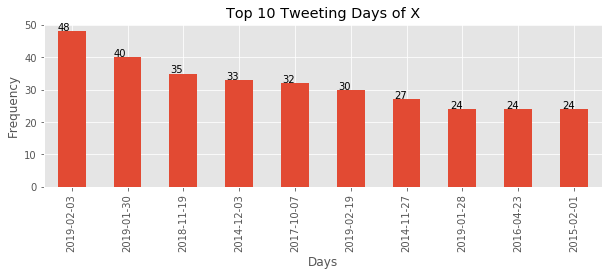

In [14]:
#Let's drop a plot of this info about top tweeting days
plotter(df, 'dates', 'Days', 'Frequency', 'Top 10 Tweeting Days of X')

### The number of tweets and number of retweets.

In [15]:
#To get the this detail we look at the 'text' column as it holds the tweet
#All that start with 'RT' are retwets by the subject otherwise they their original tweet
tweets = [line for line in df.text if not line.startswith('RT')]
retweets = [line for line in df.text if line.startswith('RT')]

#To proof-check, the length of these two should be equal too 3,299 ie total number of tweets
len(retweets) + len(tweets) == len(df)

True

In [16]:
len(df)

3229

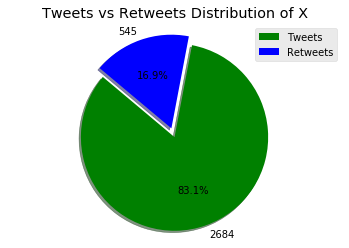

In [17]:
#Data to Plot
len_tweets = len(tweets)
len_retweets = len(retweets)

labels = 'Tweets', 'Retweets'
sizes = [len_tweets, len_retweets]
colors = ['green', 'blue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels = sizes, autopct='%1.1f%%', colors=colors, shadow=True, startangle=140)

plt.axis('equal')
plt.title("Tweets vs Retweets Distribution of X")
plt.legend(labels)
plt.show()

### Which 5 people did they retweet their posts the most and how many each.
- We find these guys from the text column by isolating the retweets and grabbing the first mention

In [18]:
#Working with the list of tweets and retweets above
#Let's eyeball things in both list to be sure we are on track
#First 5 tweets on list
tweets[:5]

['On behalf of my family, I wish @bukolasaraki a very happy birthday. May Allah grant you many more years in good health and continued service to Nigeria. -AA https://t.co/YYHcR3AaSX',
 'How sweet of my grandchildren to bring me a belated birthday cake. #smiles https://t.co/gjak4bGmdt',
 'On behalf of my family, I thank those present and also well-wishers for their prayers at the Wedding Fatiha of my dear son, @HHMustaphaAA and his wife, Afrah El-Nafaty. May Allah bless you all for making it a truly special day for me and my family. -AA https://t.co/a6xniZXW1l',
 'I congratulate @BorisJohnson on his reelection as Prime Minister of the United Kingdom. -AA',
 '#HumanRightsDay means that the global human community abhors dictatorial regimes. To celebrate this day therefore, I again call for the immediate release of all prisoners of good conscience in Nigeria and demand a jettisoning of repressive legislation against free speech - AA.']

In [19]:
#First 5 retweets on list
retweets[:5]

["RT @AUNigeria: HAPPENING NOW: AUN Founder's Day 2019. You are all welcome to this special occasion.\n\nWatch here: https://t.co/W6tXmUQ6oD ht…",
 'RT @omonlakiki: Twenty years ago, Women Trafficking &amp; Child Labour Eradication Foundation (WOTCLEF) was founded by Hajiya Titi Amina Abubak…',
 'RT @omonlakiki: Emmanuel Kwache, veteran journalist &amp; pioneer staff of Atiku Media Office was loyal, resourceful &amp; personable. On behalf of…',
 'RT @PeterObi: It was reassuring that notwithstanding his age and health challenges, Prof Ben Nwabueze (SAN), patriot and foremost constitut…',
 'RT @omonlakiki: No businessman (living or dead) in Africa has worked harder for democracy or contributed more to the progress of higher  ed…']

In [20]:
#Extract the first mention in each retweet
#We're breaking out of the inner loop after first mention instance as we know a line could feature more than 1 mention
retweetees = []
for line in retweets:
    for item in line:
        if item.startswith('@'):
            x = line.split()[1] #split that line of tweet and take the second item, the mention
            x = x.replace(':', '') #it comes with a colon so we replace it with nothing
            retweetees.append(x) #add to our list
            break #So we don't pick up any other one along the line after the first

#Alterantively and shorter, since we know that the retweetee is always the second thing on a line of tweet we can
#just take them out
retweetees2 = [line.split()[1].replace(':', '') for line in retweets] #You gotta love list comprehensions!

In [21]:
#If this went well, we know we should have as many retweetees as there are retweets namely 545.
#Let's check
print(len(retweetees) == len(retweets))
print(len(retweetees2) == len(retweets))
print(retweetees2[:5] == retweetees[:5])

True
True
True


In [22]:
#A look at our retweetees list. First 5
retweetees[:5]

['@AUNigeria', '@omonlakiki', '@omonlakiki', '@PeterObi', '@omonlakiki']

In [23]:
#Let's find the frequency they occur and so the top 5 of them that X retweeted their tweet
freq = Counter(retweetees)
freq

Counter({'@AUNigeria': 25,
         '@omonlakiki': 31,
         '@PeterObi': 2,
         '@legitngnews': 1,
         '@HHMustaphaAA': 1,
         '@engr_louis_': 1,
         '@Mimi89816009': 1,
         '@themangerajake': 1,
         '@UchennaViktor': 1,
         '@ayoolamide84': 1,
         '@YouthsForAtiku': 2,
         '@BetterWithAtiku': 1,
         '@Mr_Icey02288': 1,
         '@Chachalistic': 1,
         '@GazaliAdc': 1,
         '@jamilukusada': 1,
         '@DannySENATOR': 1,
         '@marcymoore11111': 1,
         '@kizzysly': 1,
         '@NaijaJagaban': 1,
         '@Amchizzy': 1,
         '@OghomitseAghog1': 1,
         '@jide_olafare': 2,
         '@GovIfeanyiOkowa': 3,
         '@IamAnderson4': 1,
         '@Chuxswag': 1,
         '@MediaManifold': 1,
         '@EKY2019': 1,
         '@IncredibleMyno': 1,
         '@JGanobi': 1,
         '@abdulgafaryy': 1,
         '@iamharrisug': 1,
         '@Austinelordlaz': 1,
         '@Ijomanta_Jnr': 1,
         '@LugardFredo': 1,

In [24]:
#This is a handful and I hope we get to explain it some day
#What we achieved here is sort the dictionary into a list of tuples pushing the ones with highest occurrnce to the top
sorted_outcome = [(mention, amount) for mention, amount in sorted([(x,y) for y,x in freq.items()], reverse=True)]
#A look at the top 5
sorted_outcome[:5]

[(117, '@AtikuOrg'),
 (31, '@omonlakiki'),
 (25, '@AUNigeria'),
 (24, '@SpokesManAtiku'),
 (14, '@Mustyblax')]

In [25]:
#Let's do this a more friendly way with pandas
#Make an empty dataframe
retweetees_df = pd.DataFrame()
#Create a column with the mentions list
retweetees_df['mentions'] = retweetees
#Get a value count 
retweetees_df.mentions.value_counts().head() #See how it is exact same result like above

@AtikuOrg          117
@omonlakiki         31
@AUNigeria          25
@SpokesManAtiku     24
@Mustyblax          14
Name: mentions, dtype: int64

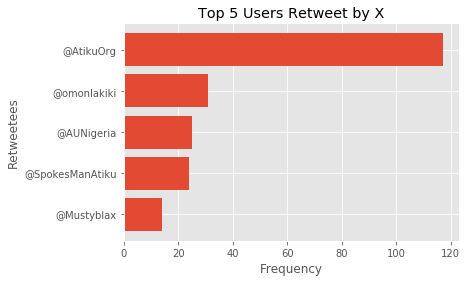

In [26]:
#Plotting with Matplot
mentions = [line[1] for line in sorted_outcome[:5]][::-1]
y_pos = range(len(mentions))
frequnecy = [line[0] for line in sorted_outcome[:5]][::-1]

plt.barh(y_pos, frequnecy, align='center')
plt.yticks(y_pos, mentions)
plt.xlabel('Frequency')
plt.ylabel('Retweetees')
plt.title('Top 5 Users Retweet by X')

plt.show()

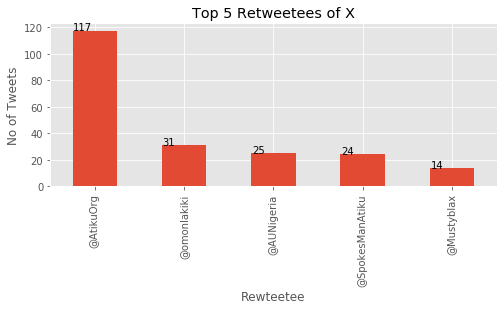

In [27]:
ax = retweetees_df.mentions.value_counts().head().plot(kind='bar', figsize=(8,3),
                                        grid=True,
                                        title='Top 5 Retweetees of X')
ax.set_xlabel("Rewteetee")
ax.set_ylabel("No of Tweets")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### What top 5 hours of the day do they tweet.

In [28]:
#Let's create another column 'hours' in our original df from created_at. result will be like 00, 01...24 hrs of the day
df['hours'] = [line.time().hour for line in df.created_at]
#A peek
df.hours.head(2)

0     8
1    16
Name: hours, dtype: int64

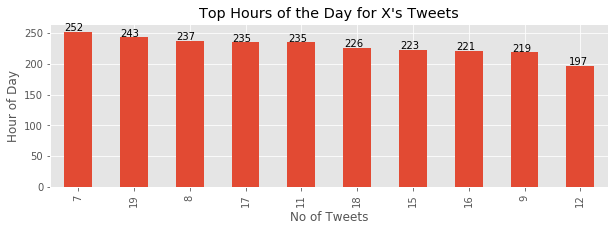

In [29]:
#Lets drop a plot passing the arguments needed
plotter(df, 'hours', 'No of Tweets', 'Hour of Day', "Top Hours of the Day for X's Tweets")

### What kind of device do they use to tweet.

In [30]:
#This info is held on the 'source' column
df.source.head(2)

0    Twitter for iPhone
1    Twitter for iPhone
Name: source, dtype: object

In [31]:
#A frequency count with value counts
df.source.value_counts()

Twitter for iPhone      3097
Twitter Web App           62
Twitter Web Client        61
Medium                     4
Periscope                  3
Twitter Media Studio       1
Facebook                   1
Name: source, dtype: int64

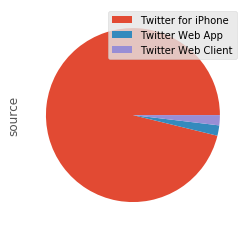

In [32]:
#Let's drop a simple distro plot of the frequency of top 3 items on the list
df.source.value_counts().head(3).plot.pie(labels = None, legend=True)

# Next up
- On average, how many times do they tweet a day.

# Bonus Content
- This is a quick plot of the activities of X
- Their hottest tweet time from 2015 is early 2019 maxing at almost 50 tweets a day at a point.

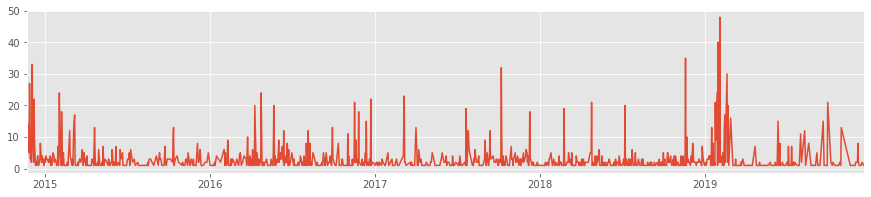

In [33]:
#First let's see the trend of their tweets over the period
df.dates.value_counts().plot(figsize=(15,3))